In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df = pd.read_csv('final.csv')
df.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
2949,25,1.549,57.0,23.74,No,Normal,100,70,Modarate,Normal,No,No,No,1,2
151,30,1.524,62.5,26.91,No,Normal,120,70,Normal,Normal,No,No,No,1,3
2051,21,1.473,63.6,29.31,No,Normal,120,90,Normal,Normal,No,No,No,2,4
1785,23,1.422,51.0,25.21,No,No_delivary,110,70,Normal,Low,No,No,Yes,0,2
1781,24,1.499,51.5,22.93,No,Normal,130,80,Normal,Normal,Yes,No,Yes,1,2


In [2]:
df['Blood Group ( is Negative?)'] = df['Blood Group ( is Negative?)'].map({'Yes':1,'No':0})
df['Jaundice'] = df['Jaundice'].map({'Yes':1,'No':0})
df['Diabetes'] = df['Diabetes'].map({'Yes':1,'No':0})
df['Risk'] = df['Risk'].map({'Yes':1,'No':0})
df['Delivery Type'] = df['Delivery Type'].map({'No_delivary':0,'Normal':1,'C-section':2})
df['Edema'] = df['Edema'].map({'Normal':0,'High':2,'Modarate':1})
df['Anemia'] = df['Anemia'].map({'Normal':0,'Low':1,'Very-Low':2})

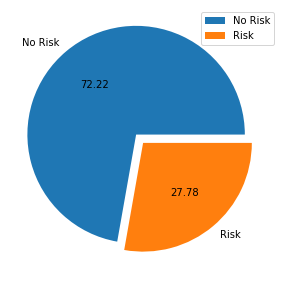

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.pie(df['Risk'].value_counts(), labels=['No Risk','Risk'], autopct = "%0.2f",explode = [0.1,0])
plt.legend()
plt.show()

In [4]:
for i in range(len(df)):
    df.loc[i,'parity'] = df.loc[i,'Gravida'] - df.loc[i,'Para']
df['parity'] = df['parity'].astype(int)
df = df.drop(['Height', 'Weight','Para','Gravida'],axis=1)
df.columns[:]

Index(['Age', 'BMI', 'Blood Group ( is Negative?)', 'Delivery Type',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Edema',
       'Anemia', 'Jaundice', 'Diabetes', 'Risk', 'parity'],
      dtype='object')

In [23]:
x = df.drop(['Risk'],axis=1)
y = df.Risk

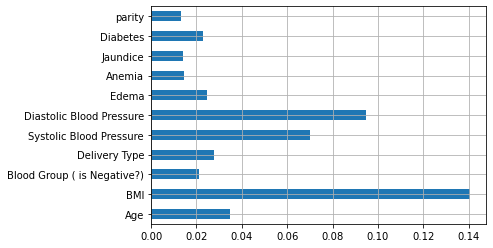

In [31]:
from sklearn.feature_selection import mutual_info_classif

im = mutual_info_classif(x,y)
fe_im= pd.Series(im,x.columns)
fe_im.plot(kind='barh', grid=True)
plt.show()

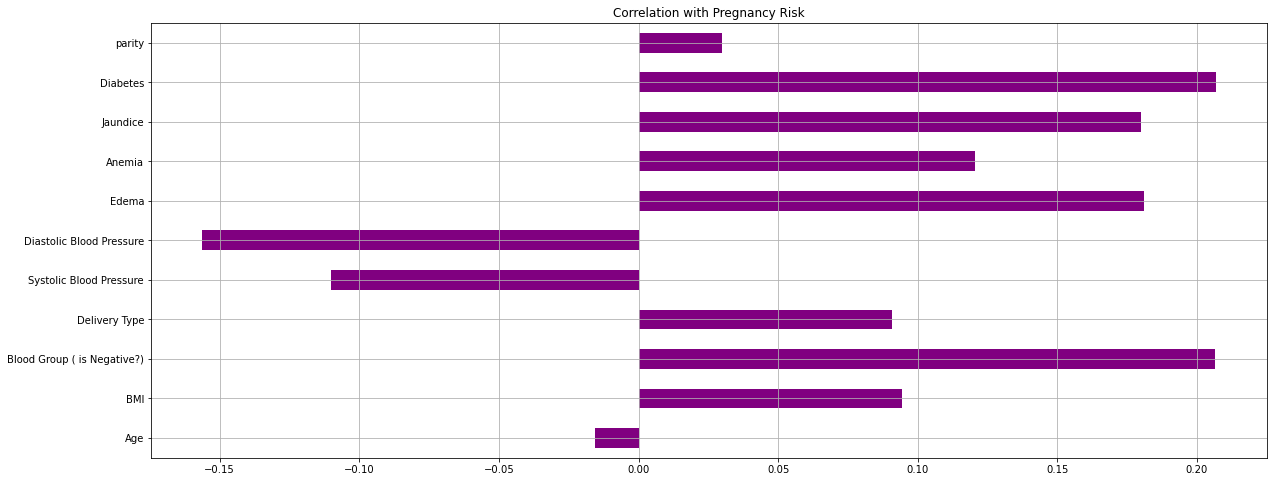

In [14]:
df.drop('Risk', axis=1).corrwith(df.Risk).plot(kind='barh', grid=True, figsize=(20, 8)
, title="Correlation with Pregnancy Risk",color="Purple");

In [8]:
df['Systolic Blood Pressure'][df['Risk']==0].value_counts()

120    1003
110     882
100     370
130     229
140      64
125      17
90       10
115       4
150       3
105       2
Name: Systolic Blood Pressure, dtype: int64

In [9]:
df['Systolic Blood Pressure'][df['Risk']==0].value_counts()

120    1003
110     882
100     370
130     229
140      64
125      17
90       10
115       4
150       3
105       2
Name: Systolic Blood Pressure, dtype: int64